# Distribución F

La distribución F o distribución de Fisher-Snedecor es una distribución de probabilidad continua que juega un papel crucial en el análisis de varianza (ANOVA), pruebas de hipótesis sobre coeficientes en regresión lineal múltiple, y en comparaciones de varianzas de dos muestras independientes. Es fundamentalmente importante en el contexto de pruebas que comparan modelos estadísticos.

## Características Principales

* Forma: La distribución F es *asimétrica* y se extiende solo hacia *valores positivos*, con una cola que se alarga hacia la derecha. La forma específica de la distribución depende de dos parámetros de grados de libertad.
* Uso: Se utiliza principalmente para probar si dos muestras tienen **varianzas significativamente diferentes** y en el contexto de ANOVA para comparar varios medios de grupo, proporcionando una herramienta para entender si las diferencias en medias entre grupos son más grandes de lo que se esperaría por casualidad.

## Parámetros
La distribución F está definida por dos conjuntos de grados de libertad:

* Grados de libertad del numerador ($df_1$): Estos generalmente corresponden al número de grupos menos uno ($k−1$) en el ANOVA, o al número de parámetros estimados en la regresión.

* Grados de libertad del denominador ($df_2$): Estos corresponden al número total de observaciones menos el número de grupos en ANOVA ($N−k$), o al número de observaciones menos el número de parámetros estimados en la regresión.

## Función de Densidad de Probabilidad (FDP)
La FDP de la distribución F es:

$$
f(x; df_1, df_2) = \cfrac{\sqrt{\cfrac{(df_1 x)^{df_1}(df_2)^{df_2}}{(df_1 x+df_2)^{df_1+df_2}}}}{x B\left(\frac{df_1}{2}, \frac{df_2}{2}\right) }
$$
donde $B$ es la función beta, y $x≥0$.

## Ejemplo: Comparación de Varianzas

Supongamos que un investigador desea saber si dos máquinas producen componentes con la misma varianza en sus dimensiones. Las varianzas muestrales calculadas y los grados de libertad para cada máquina son como sigue:

* Máquina A: Varianza muestral = 20, $df_1=15$
* Máquina B: Varianza muestral = 30, $df_2=20$

La estadística de prueba F se calcula como:

$$F= \cfrac{\text{Varianza Máquina A}}{\text{Varianza Máquina B}} = \cfrac{20}{30}=0.66$$


El valor F calculado se compara entonces con los valores críticos de la distribución F con $df_1=15$ y $df_2=20$ para determinar si hay una diferencia significativa en las varianzas.

Text(0, 0.5, 'Probability Density')

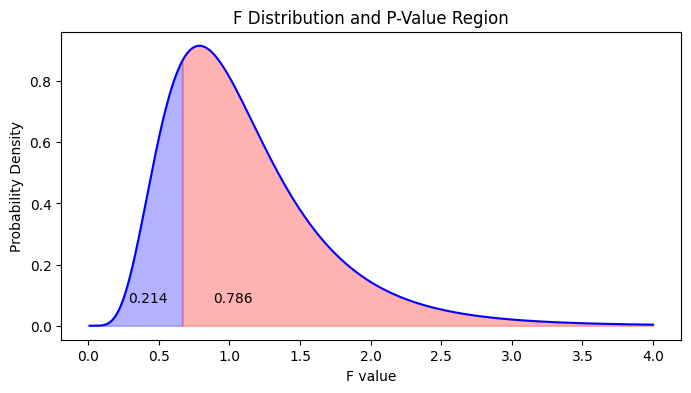

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

# Parámetros de la distribución F
df1 = 15
df2 = 20

# Crear valores x para la FDP
x = np.linspace(0.01, 4, 1000)
fdp = f.pdf(x, df1, df2)

# Calcular p-valor
F_calculado = 2/3
p_valor = f.cdf(F_calculado, df1, df2)
p_valor_complemento = 1 - p_valor

# Graficar la FDP
plt.figure(figsize=(8, 4))
plt.plot(x, fdp, 'b-', label=f'F-distribution df1={df1}, df2={df2}')
plt.text(2/3-0.1, 0.075, round(p_valor,3), horizontalalignment='right')
plt.text(2/3+0.5, 0.075, round(1-p_valor,3), horizontalalignment='right')
plt.fill_between(x, fdp, where=(x < F_calculado), color='blue', alpha=0.3)
plt.fill_between(x, fdp, where=(x >= F_calculado), color='red', alpha=0.3)
plt.title('F Distribution and P-Value Region')
plt.xlabel('F value')
plt.ylabel('Probability Density')


In [ ]:
p_valor = f.cdf(F_calculado, df1, df2)
p_valor

0.21367704683226116

In [ ]:
p_valor_complemento = 1 - p_valor
p_valor_complemento

0.7863229531677388

La probabilidad de que el cociente de las varianzas sea menor que 2/3 o 0.66 es del 0.21, es más probable que el cociente de las varianzas sea mayor de 0.66.

# Teorema del límite central

El Teorema del Límite Central establece que, en situaciones muy generales, cuando se suma un gran número de variables aleatorias independientes y de idéntica distribución (i.i.d.), la suma tiende hacia una distribución normal, sin importar la forma de la distribución original de las variables, siempre y cuando exista una media y varianza finitas.

Formulación Matemática:

Supongamos que $X_1, X_2, \dots, X_n$  son variables aleatorias i.i.d. con media $μ$ y varianza $\sigma^2$
 Define:
$$\bar{X} = \cfrac{1}{n}(X_1+ X_2+ \dots+ X_n)$$

Entonces, a medida que $n$ se aproxima a infinito, la variable aleatoria normalizada

$$
Z_n = \cfrac{\bar{X}-μ}{\sigma/\sqrt{n}}
$$

converge en distribución a una variable aleatoria normal estándar $N(0,1)$. Esto significa que:

$$
\lim_{n \to ∞} P(a \leq Z_n \leq B) = N(b;0,1)-N(a;0,1)
$$


### Ejemplo

Imaginemos que se lanza un dado de seis caras (un dado justo) muchas veces. Cada lanzamiento del dado es una variable aleatoria independiente, cuya distribución de probabilidad es uniforme para los números 1 a 6. Por tanto, la media $μ=3.5$ y la varianza $σ^2 =35/12$.

Recuerda que la distribución uniforme
Media: $μ = \frac{1+2+3+4+5+6}{6} =3.5$
Varianza:  $\sigma^2 = \frac{\sum_{i=1}^{6}(x_i - 3.5)^2}{6}=2.91$



In [3]:
(1+2+3+4+5+6)/6

3.5

In [4]:
((1-3.5)**2+(2-3.5)**2+(3-3.5)**2+(4-3.5)**2+(5-3.5)**2+(6-3.5)**2)/6

2.9166666666666665

In [5]:
35/12

2.9166666666666665

### Aplicación del Teorema del Límite Central:

Si se lanza el dado $n$ veces y se calcula la media de los resultados, esa media también será una variable aleatoria. A medida que $n$ aumenta, la distribución de la media de los lanzamientos del dado se aproximará a una distribución normal debido al TLC.


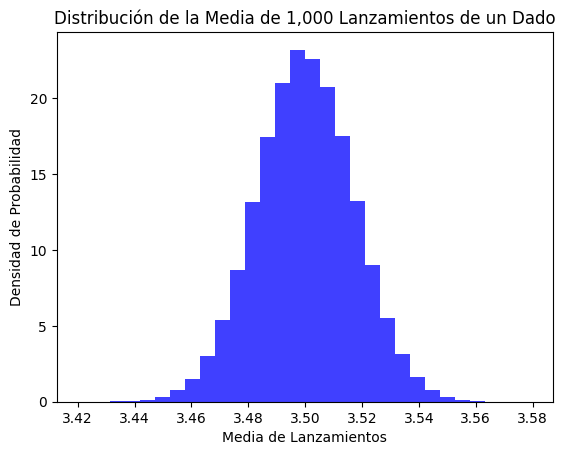

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Lanzar el dado 1,000 veces, repetir el experimento 10,000 veces.
n = 10000
repeticiones = 100000
resultados = np.random.randint(1, 7, (repeticiones, n))
medias = resultados.mean(axis=1)

# Graficar el histograma de las medias
plt.hist(medias, bins=30, density=True, alpha=0.75, color='blue')
plt.title('Distribución de la Media de 1,000 Lanzamientos de un Dado')
plt.xlabel('Media de Lanzamientos')
plt.ylabel('Densidad de Probabilidad')
plt.show()


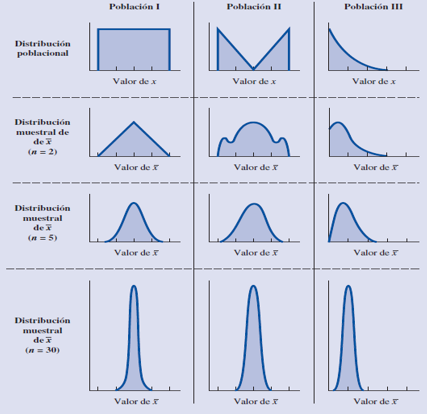